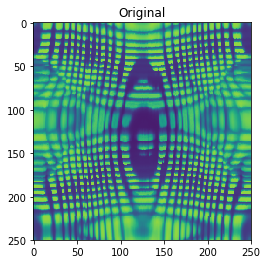

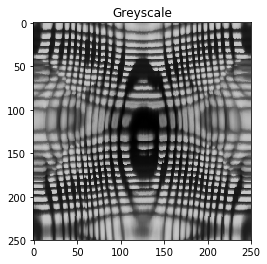

"\n# Apply threshold\nthreshold = np.sum(grayScaleImage) / np.size(grayScaleImage)\n\nthresholdedImage = (grayScaleImage[:, :] > threshold) * 255\npyplot.imshow(thresholdedImage, cmap= pyplot.cm.gray)\npyplot.title('Thresholded')\npyplot.show()\n"

In [57]:
# Libraries
import numpy    as     np
import imageio
from   scipy       import ndimage
from   scipy       import misc
from   scipy       import signal
from skimage       import data
from skimage.color import rgb2gray

from   matplotlib import cm
from   matplotlib import pyplot

# Imports "Modern Art" image in which to detect axis of symmetry in x and y

originalImage  = imageio.imread('Target.bmp')
pyplot.imshow(originalImage)
pyplot.title('Original')
pyplot.show()

grayScaleImage = rgb2gray(originalImage)
pyplot.imshow(grayScaleImage, cmap= pyplot.cm.gray)
pyplot.title('Greyscale')
pyplot.show()

"""
# Apply threshold
threshold = np.sum(grayScaleImage) / np.size(grayScaleImage)

thresholdedImage = (grayScaleImage[:, :] > threshold) * 255
pyplot.imshow(thresholdedImage, cmap= pyplot.cm.gray)
pyplot.title('Thresholded')
pyplot.show()
"""

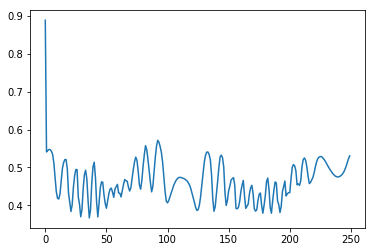

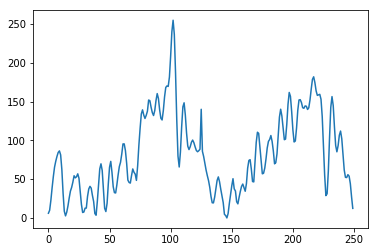

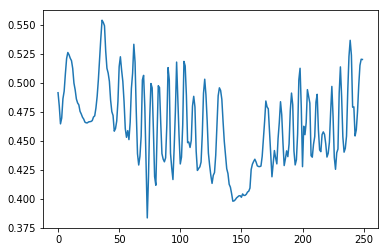

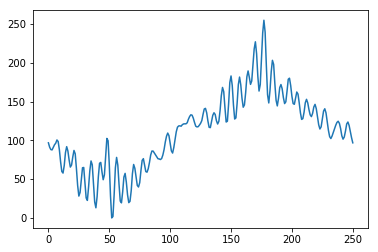

In [59]:
import numpy    as     np
from   scipy    import signal
from   scipy    import ndimage

# Finds correlation of image with reversed version along each
# axis for symmetry detection

imageSize = np.shape(grayScaleImage) # Exports as (height, width, depth)

"""
verticalConvolutions = np.zeros((imageSize[0], imageSize[1]));
for horizontalIndex in range(imageSize[1]):
    targetColumn  = grayScaleImage[:, horizontalIndex]
    patternColumn = targetColumn
    # Pads targetColumn to emulate wraparound
    patternConcatenatedColumn  = np.concatenate([targetColumn[int(round(imageSize[1]/2.0)):], targetColumn, targetColumn[:-int(round(imageSize[1]/2.0))]])
    # Preforms convolution
    convolutionColumn = np.convolve(targetColumn, patternConcatenatedColumn, mode = 'valid')
    convMax = np.amax(convolutionColumn)
    convMin = np.amin(convolutionColumn)
    convolutionColumn = ((convolutionColumn - convMin) / (convMax - convMin)) * 255
    verticalConvolutions[:, horizontalIndex] = convolutionColumn[:-1]

pyplot.imshow(verticalConvolutions, cmap = pyplot.cm.viridis)
pyplot.title('Symmetry across Vertical Axis')
pyplot.show()
"""

compressedColumn = np.average(grayScaleImage, axis = 1)
pyplot.plot(compressedColumn)
pyplot.show()

# Pads targetColumn to emulate wraparound
patternConcatenatedColumn  = np.concatenate([compressedColumn[int(round(imageSize[1]/2.0)):], compressedColumn, compressedColumn[:-int(round(imageSize[1]/2.0))]])
# Preforms convolution
convolutionColumn = ndimage.filters.convolve1d(compressedColumn, compressedColumn, mode = 'wrap')
convMax = np.amax(convolutionColumn)
convMin = np.amin(convolutionColumn)
convolutionColumn = ((convolutionColumn - convMin) / (convMax - convMin)) * 255
pyplot.plot(convolutionColumn)
pyplot.show()
    
"""
# Reverses image along vertical axis and runs correlation through every row
horizontalCorrelations = np.zeros((imageSize[0], imageSize[1]))
for verticalIndex in range(imageSize[0]):
    targetRow = thresholdedImage[verticalIndex, :]
    patternRow = targetRow #np.flipud(targetRow)
    # Pads for wraparound
    targetRow = np.concatenate((targetRow, targetRow, targetRow), axis = 0)
    # Preforms correlation
    correlationRow = np.correlate(targetRow, patternRow, mode = 'same')
    horizontalCorrelations[verticalIndex, :] = correlationRow[(int(imageSize[1] * 1.5)):(int(imageSize[1] * 2.5))]
    
pyplot.imshow(horizontalCorrelations, cmap = pyplot.cm.gray)
pyplot.title('Symmetry across Vertical Axis')
pyplot.show()
"""

compressedRow = np.average(grayScaleImage, axis = 0)
compressedRow = np.roll(compressedRow, 25)
pyplot.plot(compressedRow)
pyplot.show()

# Pads targetColumn to emulate wraparound
patternConcatenatedRow  = np.concatenate([compressedRow[int(round(imageSize[0]/2.0)):], compressedRow, compressedRow[:-int(round(imageSize[0]/2.0))]])
pyplot.plot(patternConcatenatedRow)
pyplot.show()
# Preforms convolution
convolutionRow = np.convolve(compressedRow, patternConcatenatedRow, mode = 'valid')
convMax = np.amax(convolutionRow)
convMin = np.amin(convolutionRow)
convolutionRow = ((convolutionRow - convMin) / (convMax - convMin)) * 255
pyplot.plot(convolutionRow)
pyplot.show()